Women in Data Science 2021

Author: Paola Gasparini 15-07-2021

This workbook is using data available in Kaggle website "Women in Data Science 2021" regarding patients with Diabetes Mellitus in Intensive Care Unit and the main questions we want to answers are the following:


 1) What are the variables that are highly correlated with the Diabetes Mellitus (target one)?
 
 2) What are the ones that have a low correlation with it?
 


 3) Considering our dataset, which disease is causing more number of days in hospital admission before icu (pre_icu_los_days)?
 
 4) Considering the correlation between weight and Diabetes Mellitus, is there a significant difference in weights among people with different ethnical backgrounds?

 5) Sometimes in the Intensive Care Unit (ICU) there are patients that don't have a complete clinical history immediately available.  In ICU time is very important to save lives and the question many doctors want to know is the following: can we derive if a patient has the Diabetes Mellitus (chronic disease) from the tests that we are doing when we admit him in the unit?
 
To answer these questions we are using the typical steps of a data science process: gather, assess, clean, analyze, model and visualize. The visualisation of the data is a continous point that is happening during all the steps of the process. 

# **Gather data**

Data is imported from csv files available in the kaggle website.

In [4]:
#loading the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer as MICE
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score ,roc_curve,auc, accuracy_score


In [5]:
# set option to always display max number of columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
#read training set from csv file
df = pd.read_csv('C:/Users/Paola/Documents/Python/Udacity/Project_1/TrainingWiDS2021.csv')
df_raw = df.copy()
#read test set from csv file
df_unlabel = pd.read_csv('C:/Users/Paola/Documents/Python/Udacity/Project_1//UnlabeledWiDS2021.csv')
unlabel_raw = df_unlabel.copy() 

# **Assess data**

In [1]:
#show the information of the training set and test set 
print('Shape of data training : {}'.format(df.shape)) 
print('Shape of data unlabel (test): {}'.format(df_unlabel.shape)) 


NameError: name 'df' is not defined

In [84]:
#show the information of the training set and its top 5 records
df.info()
df.describe()
np.shape(df)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(157), int64(18), object(6)
memory usage: 179.7+ MB


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

count histogram of diabetes mellitus

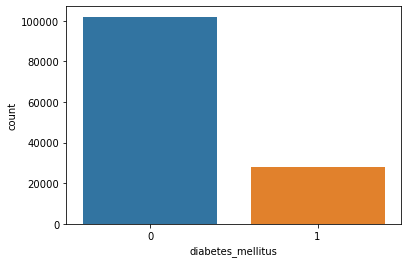

In [10]:
sns.countplot(x='diabetes_mellitus',data=df)

percentage calculations of diabetes mellitus (target variable):

In [86]:
(df['diabetes_mellitus'].value_counts()/df['diabetes_mellitus'].count())*100

0    78.371505
1    21.628495
Name: diabetes_mellitus, dtype: float64

we can see that the training set is highly unbalanced, around 22 percentage is diabetes versus 78 non diabetes


check if there are missing values using heatmap (yellow lines are missing records):

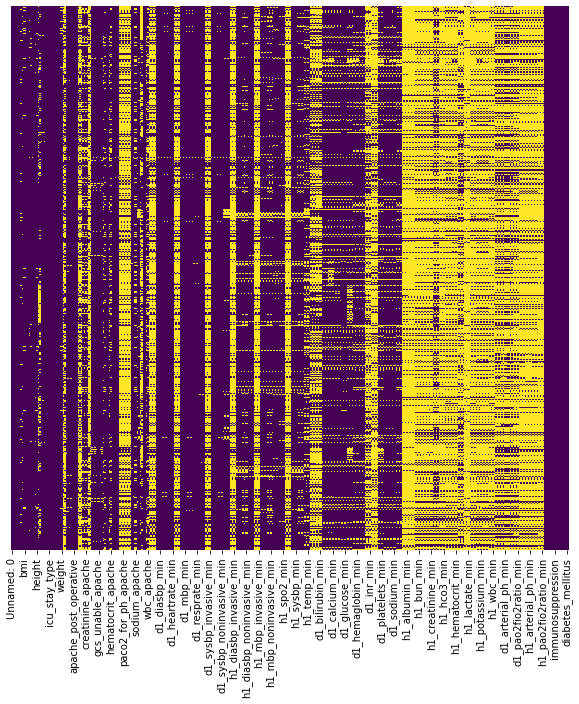

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

we can see that there are columns full of missing values, we clean the data removing these columns

Checking missing values and columns where there are more than 80% missing values

Creating function to add column "percentage missing values". We created a function so we can check the test set as well 

In [88]:
def table_missing_values(dataset):
    """
    Creating a column "missing_perc" to show the missing
    value percentage
    """
    Missing_valuestable = pd.DataFrame(dataset.isnull().mean() * 100)
    Missing_valuestable.columns={'Missing_perc'}
    
    Missing_valuestable.reset_index()
    
    return Missing_valuestable

In [89]:
MV = table_missing_values(df)
MV =MV[MV['Missing_perc']>80]
MV = MV.reset_index()

Listcolumn_manymissings = MV['index'].to_list()
MV

,index,Missing_perc
0,h1_diasbp_invasive_max,80.540424
1,h1_diasbp_invasive_min,80.540424
2,h1_mbp_invasive_max,80.492021
3,h1_mbp_invasive_min,80.492021
4,h1_sysbp_invasive_max,80.523522
5,h1_sysbp_invasive_min,80.523522
6,h1_albumin_max,91.431886
7,h1_albumin_min,91.431886
8,h1_bilirubin_max,92.089553
9,h1_bilirubin_min,92.089553


There are 31 columns with more than 80% of missing values.

# **Clean data**

Remove these 31 columns

In [90]:
df.drop(Listcolumn_manymissings, axis=1, inplace=True)

# **Analyse data**

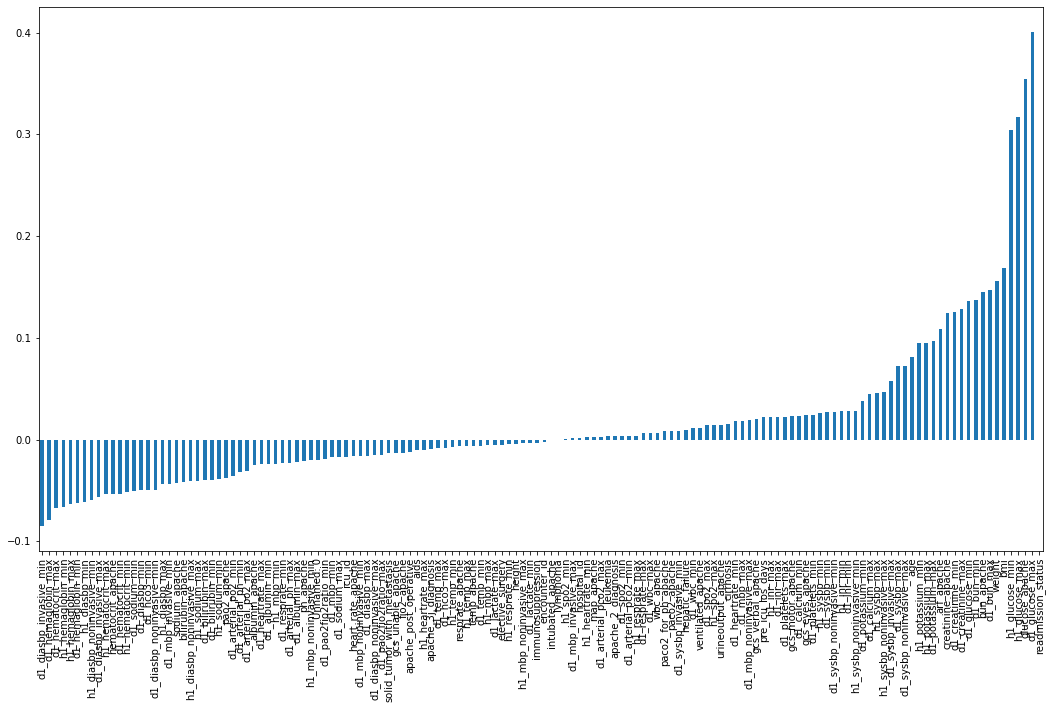

In [91]:
plt.figure(figsize=(18,10))
df.corr()['diabetes_mellitus'][:-1].sort_values().plot(kind='bar')
Mcorr = pd.DataFrame(df.corr()['diabetes_mellitus'][:-1].sort_values().abs())

Mcorr = Mcorr.reset_index()


Check the variables that are highly correlated with the target one and the ones that have a low correlation with the target variable, in absolute value.

**1) What are the variables that are highly correlated with the Diabetes Mellitus (target one)?**

In [92]:
Mcorrhigh=Mcorr[Mcorr['diabetes_mellitus']>0.1].sort_values(by=['diabetes_mellitus'])
Listcolumn_high_corr = Mcorrhigh['index'].tolist()
Mcorrhigh

,index,diabetes_mellitus
127,arf_apache,0.108469
128,creatinine_apache,0.124891
129,d1_creatinine_min,0.125828
130,d1_creatinine_max,0.127929
131,d1_glucose_min,0.135848
132,d1_bun_min,0.137304
133,bun_apache,0.145241
134,d1_bun_max,0.146990
135,weight,0.155517
136,bmi,0.169043


we can see creatinine, glucose, bun in blood and weight and bmi are quite correlated with this chronic disease that is diabetes mellitus.

**2) What are the ones that have a low correlation with it?**

In [93]:
Mcorrlow=Mcorr[Mcorr['diabetes_mellitus']<0.05].sort_values(by=['diabetes_mellitus'])
Listcolumn_low_corr = Mcorrlow['index'].tolist()
Mcorrlow.head(10)

,index,diabetes_mellitus
73,lymphoma,0.000253
72,intubated_apache,0.000318
74,h1_spo2_min,0.001041
75,d1_mbp_invasive_max,0.001672
76,hospital_id,0.001937
71,encounter_id,0.002007
77,h1_heartrate_min,0.002278
78,map_apache,0.002367
79,d1_arterial_pco2_max,0.002720
70,immunosuppression,0.003022


The ones above are the ten features with the lowest correlation with the variable diabetes mellitus 

In [94]:
Mcorrlow.count()

index                106
diabetes_mellitus    106
dtype: int64

we can see that 106 features have a low correlation with the variable diabetes mellitus (less than 0.05)

**3) Considering our dataset, which disease is causing more number of days in hospital admission before icu (pre_icu_los_days)?**

In [95]:
disease_dataset = df.loc[:, ['pre_icu_los_days','aids','cirrhosis','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','diabetes_mellitus']]

In [96]:
disease_dataset.head()

,pre_icu_los_days,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0.541667,0,0,0,0,0,0,0,1
1,0.927778,0,0,0,0,0,0,0,1
2,0.000694,0,0,0,0,0,0,0,0
3,0.000694,0,0,0,0,0,0,0,0
4,0.073611,0,0,0,0,0,0,0,0


In [97]:
disease_dataset2 = disease_dataset.reset_index()
disease_dataset2= pd.melt(disease_dataset2, id_vars='pre_icu_los_days', value_vars=['aids','cirrhosis','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','diabetes_mellitus'])


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

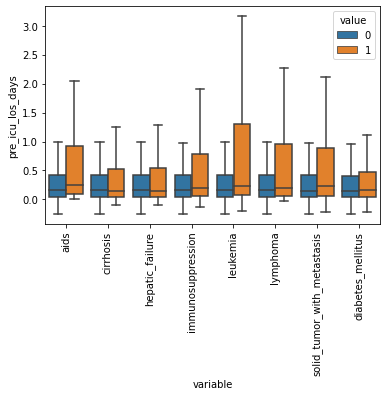

In [98]:
sns.boxplot(data=disease_dataset2, x="variable", y="pre_icu_los_days", hue="value",showfliers = False)
plt.xticks(rotation=90)

We can see that the boxplots of the different diseases are overlapping, we can conclude there isn't a significant difference in terms of pre ICU length of stay among diseases.
When leukemia, lymphoma, aids and solid_tumor_with_metastasis are present we can see that they have a higher variance compared to the other diseases and the situations without disease.

**4) Considering the great importance of weight in the Diabetes Mellitus, is there a significant difference in weights among people with different ethnical backgrounds?**

In [99]:
weight_dataset = df.loc[:, ['weight','ethnicity','diabetes_mellitus']]

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

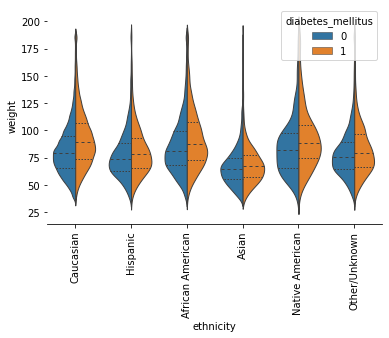

In [100]:
sns.violinplot(data=weight_dataset, x="ethnicity", y="weight", hue="diabetes_mellitus",split=True, inner="quart", linewidth=1,showfliers = False)
sns.despine(left=True)
plt.xticks(rotation=90)

Asian people have the lowest weight compare to the other ethnicity. In all the ethnicity the weight is higher in people with diabetes compared to the people with no disease but we can see that the biggest difference is in the Caucasian, African American and Native American population.  

Correlation map to see if there are variables that are highly correlated with the others, to avoid multicollinearity

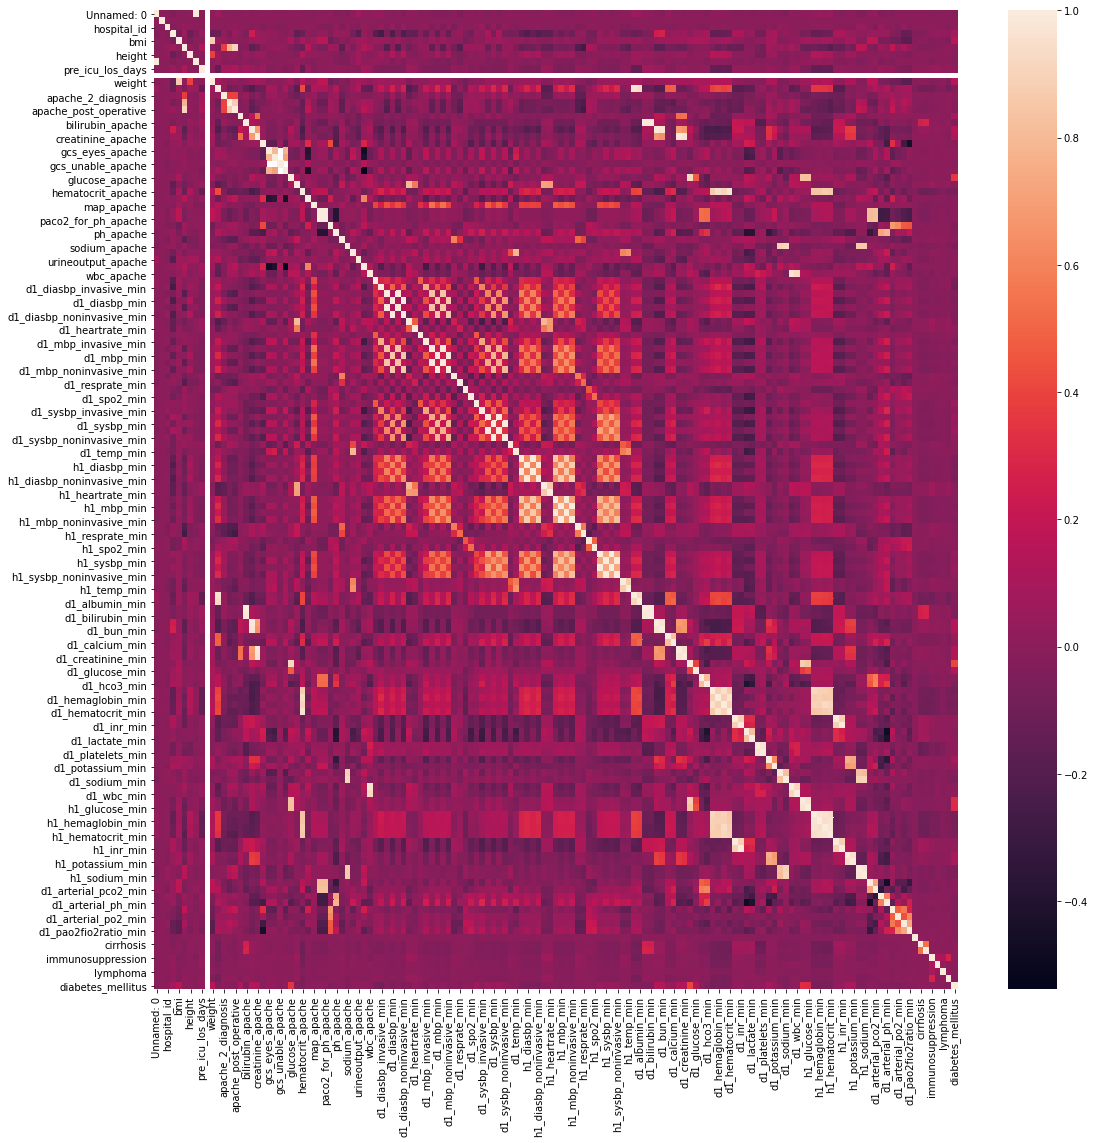

In [101]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr())

'readmission_status' is a white line, this means that it only has one value so we can drop this column because it doesn't contain useful informations

In [102]:
df['readmission_status'].value_counts()

0    130157
Name: readmission_status, dtype: int64

readmission_status has only zeros so we can remove this column.

In [103]:
df.drop(['readmission_status' ], axis=1, inplace= True)

Dropping columns with low correlation 

In [104]:
df.drop(Listcolumn_low_corr, axis=1, inplace=True)

There is no need to drop ids columns because they were already in the list of low correlated columns

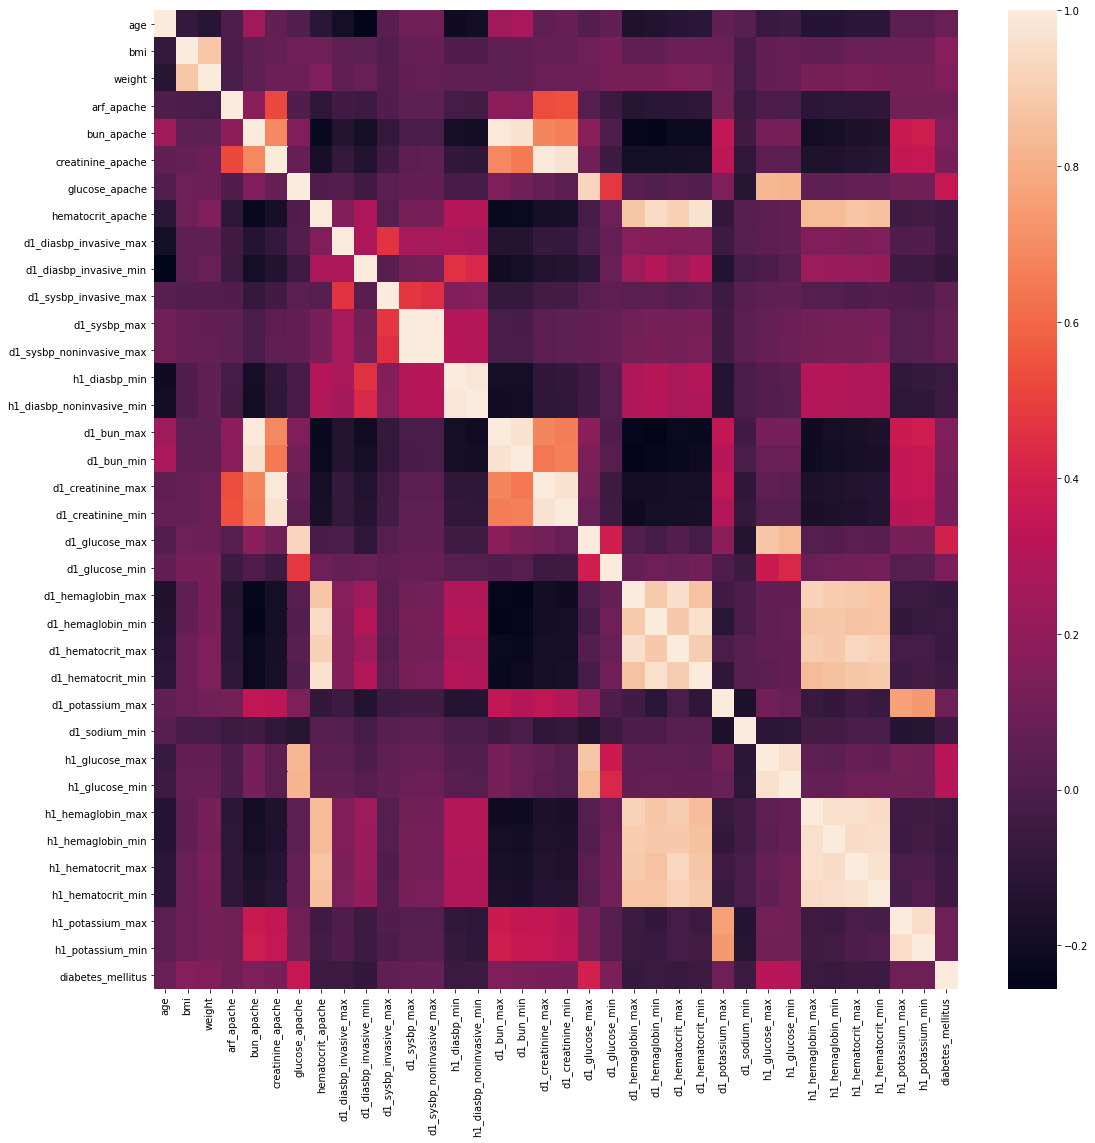

In [105]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr())

Dropping variables that are highly correlated among themselves, to avoid multicollinearity we are keeping one of the two or more. 

In [106]:
df.drop(['h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max', 'd1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','h1_glucose_max','d1_sysbp_max','d1_bun_max', 'd1_creatinine_max','h1_diasbp_min' ,'h1_potassium_min'], axis=1, inplace= True)

Creating function where we are dropping not useful columns, this function will be used durin the test set to speed up the pre-processing step. 

In [107]:
def remove_columns(dataset):
    """
    Removing from dataset the columns that are not useful (many missing values, all same values, risk of multicollinearity...)
    """
    dataset.drop(Listcolumn_manymissings, axis=1, inplace=True)
    dataset.drop(Listcolumn_low_corr, axis=1, inplace=True)
    dataset.drop(['readmission_status','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max', 'd1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','h1_glucose_max','d1_sysbp_max','d1_bun_max', 'd1_creatinine_max','h1_diasbp_min' ,'h1_potassium_min'], axis=1, inplace= True)
    

Imputing Missing Data

Use MICE to replace missing values in numerical columns

In [108]:
df_numericalcolumns= df._get_numeric_data()

In [109]:
df_numericalcolumns.iloc[:, :]  = MICE().fit_transform(df_numericalcolumns)

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Use SingleImputer to replace missing values in categorical variables, strategy "most frequent", replace missing values in ethnicity with pre-existent category Other/Unknown

In [110]:
cols = df.columns
num_cols = df._get_numeric_data().columns
list_categoricalcolumns= list(set(cols) - set(num_cols))
df_categoricalcolumns= df[list_categoricalcolumns]
df_categoricalcolumns.head()

,hospital_admit_source,icu_type,icu_admit_source,ethnicity,icu_stay_type,gender
0,Floor,CTICU,Floor,Caucasian,admit,M
1,Floor,Med-Surg ICU,Floor,Caucasian,admit,F
2,Emergency Department,Med-Surg ICU,Accident & Emergency,Caucasian,admit,F
3,Operating Room,CTICU,Operating Room / Recovery,Caucasian,admit,F
4,NaN,Med-Surg ICU,Accident & Emergency,Caucasian,admit,M


In [111]:
t = df.groupby(['icu_admit_source', 'hospital_admit_source']).sum().reset_index()[['icu_admit_source', 'hospital_admit_source']]
t

,icu_admit_source,hospital_admit_source
0,Accident & Emergency,Acute Care/Floor
1,Accident & Emergency,Chest Pain Center
2,Accident & Emergency,Direct Admit
3,Accident & Emergency,Emergency Department
4,Accident & Emergency,Floor
5,Accident & Emergency,ICU
6,Accident & Emergency,ICU to SDU
7,Accident & Emergency,Observation
8,Accident & Emergency,Operating Room
9,Accident & Emergency,Other Hospital


we can clearly see that the category Floor is available in the two columns "icu_admit_source" and "hospital_admit_source" and this can clearly create issues in the one hot encoding process. We are going to rename the category floor in the Icu_admit_source

In [112]:
icu_admit_source_d = {'Accident & Emergency': 'Accident & Emergency','Floor': 'ICU_Floor', 'Other ICU': 'Other ICU', 'Operating Room / Recovery': 'Operating Room / Recovery', 'Other Hospital': 'Other Hospital'}

In [113]:
df['icu_admit_source']= df.icu_admit_source.map(icu_admit_source_d)

singleImputer:

In [114]:
imp = SimpleImputer(strategy="most_frequent")
df_categoricalcolumns.iloc[:, :]  =imp.fit_transform(df_categoricalcolumns)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Rejoining numerical variables with categorical ones to recreate df without missing values:

In [115]:
df=pd.concat([df_numericalcolumns,df['diabetes_mellitus'],df_categoricalcolumns],axis=1)

In [116]:
np.shape(df)

(130157, 31)

We use one hot encoding to transform categorical columns into numerical ones. 

Create one hot encoding for the six categorical variables, dropping the first column created with one hot encoding. I just apply the hot encoding variables to the dataset with numerical columns in order to have our new df. 

Creating function for it so that it can be easily used in the test set 

In df_numericalcolumns all the categorical ones have been converted with one hot encoding so all the column are numerical.

In [117]:

    for i in list_categoricalcolumns:
        i= pd.get_dummies(df[i],drop_first=True)
        i=pd.DataFrame(i)
        df_numericalcolumns=pd.concat([df_numericalcolumns,i],axis=1)
    df = df_numericalcolumns

In [118]:
np.shape(df)

(130157, 57)

Apply all the pre-processing steps (up to here)  for the unlabel test data (df_unlabel).

In [119]:
remove_columns(df_unlabel)

MICE:

In [120]:
df_unlabel_numcolumns= df_unlabel._get_numeric_data()

In [121]:
df_unlabel_numcolumns.iloc[:, :]  = MICE().fit_transform(df_unlabel_numcolumns)

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


SingleImputer:

In [122]:
 df_unlabel['ethnicity'].fillna('Other/Unknown', inplace=True)

In [123]:
df_unlabel['icu_admit_source']= df_unlabel.icu_admit_source.map(icu_admit_source_d)

In [124]:
df_unlabel_categoricalcolumns= df_unlabel[list_categoricalcolumns]
df_unlabel_categoricalcolumns.iloc[:, :]  =imp.fit_transform(df_unlabel_categoricalcolumns)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Recreating the dataset with no missing values:

In [125]:
df_unlabel=pd.concat([df_unlabel_numcolumns,df_unlabel_categoricalcolumns],axis=1)

One hot encoding:

In [126]:

    for i in list_categoricalcolumns:
        i= pd.get_dummies(df_unlabel[i],drop_first=True)
        i=pd.DataFrame(i)
        df_unlabel_numcolumns=pd.concat([df_unlabel_numcolumns,i],axis=1)
    df_unlabel = df_unlabel_numcolumns

Align the dataset df with unlabel test data to make sure they have the same columns creating f_df and f_df_unlabel

In [127]:
f_df, f_df_unlabel = df.align(df_unlabel, join='inner', axis=1)
f_df['diabetes_mellitus']=df_raw['diabetes_mellitus']

remove duplicated columns, just to be sure: 

In [128]:
f_df = f_df.loc[:,~f_df.columns.duplicated()]
f_df_unlabel = f_df_unlabel.loc[:,~f_df_unlabel.columns.duplicated()]

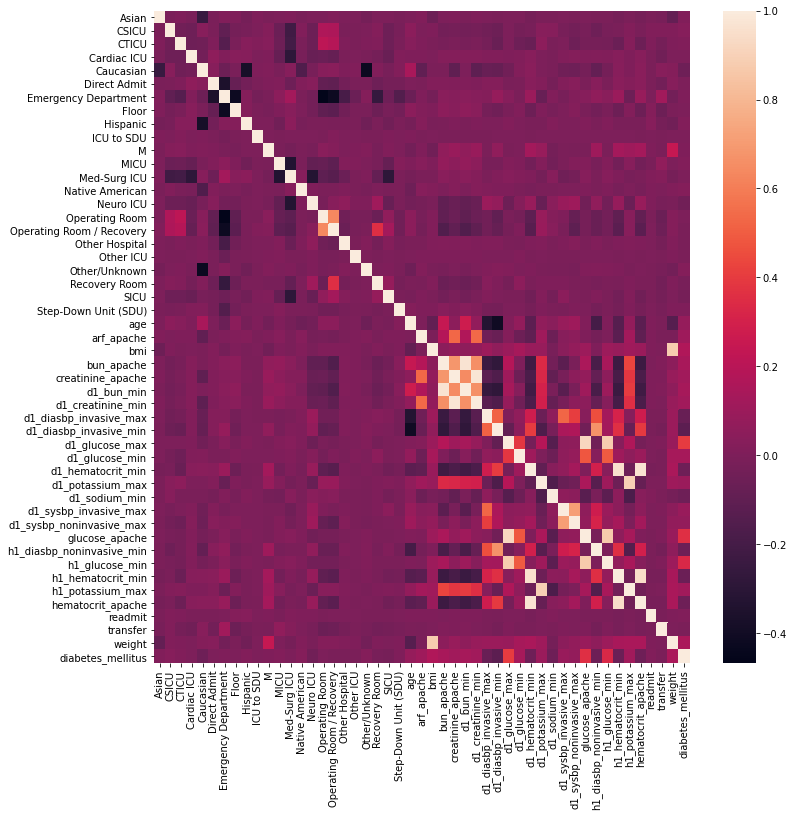

In [129]:
plt.figure(figsize=(12,12))
sns.heatmap(f_df.corr())

# Model Data

Split our f_df dataset into X and y datasets.

In [130]:
f_df.head()

,Asian,CSICU,CTICU,Cardiac ICU,Caucasian,Direct Admit,Emergency Department,Floor,Hispanic,ICU to SDU,M,MICU,Med-Surg ICU,Native American,Neuro ICU,Operating Room,Operating Room / Recovery,Other Hospital,Other ICU,Other/Unknown,Recovery Room,SICU,Step-Down Unit (SDU),age,arf_apache,bmi,bun_apache,creatinine_apache,d1_bun_min,d1_creatinine_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_glucose_max,d1_glucose_min,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_max,glucose_apache,h1_diasbp_noninvasive_min,h1_glucose_min,h1_hematocrit_min,h1_potassium_max,hematocrit_apache,readmit,transfer,weight,diabetes_mellitus
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.0,0.0,22.732803,31.000000,2.510000,30.000000,2.230000,46.000000,32.000000,168.000000,109.000000,27.400000,4.000000,134.000000,122.000000,131.0,168.000000,63.000000,86.678214,30.751498,3.568341,27.400000,0,0,73.900000,1
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,77.0,0.0,27.421875,9.000000,0.560000,9.000000,0.560000,83.519337,46.821261,145.000000,128.000000,36.100000,4.200000,145.000000,168.229256,159.0,145.000000,48.000000,143.000000,36.900000,4.200000,36.900000,0,0,70.200000,1
2,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,25.0,0.0,31.952749,22.695847,1.675323,19.815794,1.482449,89.877329,53.599574,168.123252,108.221575,33.184580,4.274892,137.445553,153.118960,148.0,151.757415,58.000000,141.797951,35.145025,4.073657,33.380474,0,0,95.300000,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,81.0,0.0,22.635548,29.257298,1.475088,23.737267,1.149660,62.000000,30.000000,185.000000,88.000000,25.900000,5.000000,138.725701,164.000000,158.0,185.000000,60.331116,119.991876,34.000000,4.315311,25.900000,0,0,61.700000,0
4,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,19.0,0.0,30.939968,21.728825,1.708232,18.799931,1.511306,93.286544,57.910653,167.289945,106.623932,33.451906,4.231951,137.294505,153.216178,147.0,150.980298,68.000000,141.324215,35.698268,4.023298,33.658957,0,0,91.992549,0


In [131]:
X = np.array(f_df.iloc[:, f_df.columns != 'diabetes_mellitus'])
y = np.array(f_df.iloc[:, f_df.columns == 'diabetes_mellitus'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (130157, 48)
Shape of y: (130157, 1)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (91109, 48)
y_train dataset:  (91109, 1)
X_test dataset:  (39048, 48)
y_test dataset:  (39048, 1)


Performing Random Undersampling and then Oversampling to rebalance the dataset

Undersampling strategy:

In [133]:
under = RandomUnderSampler(sampling_strategy=0.5)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

Oversampling strategy:

In [134]:
over = RandomOverSampler(sampling_strategy='minority')
X_train_res, y_train_res = over.fit_resample(X_train_under, y_train_under)

In [135]:
print("Raw Dataset, counts of label '1': {}".format(sum(y_train==1)))
print("Raw Dataset, counts of label '0': {} \n".format(sum(y_train==0)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_under==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

Raw Dataset, counts of label '1': [19691]
Raw Dataset, counts of label '0': [71418] 

After UnderSampling, counts of label '1': 19691
After UnderSampling, counts of label '0': 39382 

After OverSampling, counts of label '1': 39382
After OverSampling, counts of label '0': 39382 



Normalization for the inputs is mainly used in linear models/knn/neural networks and it is not required in Logistic Regressions, Random Forest Classifier and XGBoost because they're not affected by absolute values taken by features.

Creation of a xgboost model on rebalanced dataset and creation of classification report

XGboost with  Rebalanced Dataset 

In [148]:
modelgb_reb = XGBClassifier()
modelgb_reb.fit(X_train_res,y_train_res)
predictions_xgb_reb= modelgb_reb.predict(X_test)
proba_xgb_reb = modelgb_reb.predict_proba(X_test)[:,1]
print(classification_report(y_test,predictions_xgb_reb))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     30588
           1       0.55      0.80      0.65      8460

    accuracy                           0.81     39048
   macro avg       0.74      0.81      0.76     39048
weighted avg       0.85      0.81      0.83     39048



In [150]:
print("Accuracy", accuracy_score(y_test,predictions_xgb_reb))

Accuracy 0.8149969268592502


we can see that this specific XGB model is giving really good results, with a good recall for the minority class as well. 

Text(0.5, 0, 'False positive rate')

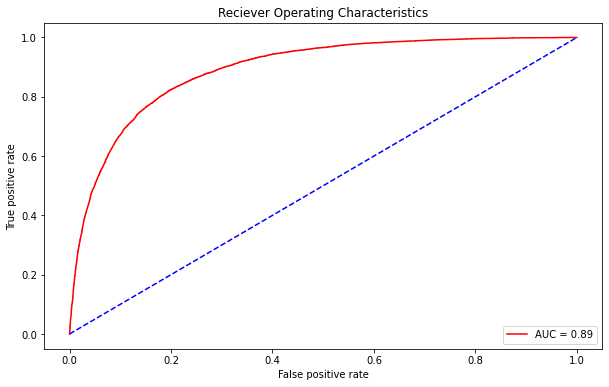

In [149]:
frp,trp, threshold = roc_curve(y_test,proba_xgb_reb)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(10,6))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [ ]:
Conclusion

In this notebook we followed the typical steps of a data science process (gather, assess, clean, analyze, model and visualize) and we answered some critical questions in the fields of the chronical disease, specifically concerning diabetes mellitus. 